## Exploring data collections using descriptive statistics
#### Authors: Ahmad Opeyemi ZUBAIR, Sara IZADI, Tiwalade OYEBODE, Al-Mu'tez Billah AL-SQOUR

### 1.   Objective

Apply descriptive statistics to explore data collections and compute
quantitative descriptions. Recall that descriptive statistics applies
the concepts, measures, and terms that are used to describe the basic
features of the samples in a study. Together with simple graphics, these
measures form the basis of quantitative analysis of data. To describe
the sample data and to be able to infer any conclusion, we should go
through several steps: data preparation and descriptive analytics.

### 2.   Material

-   Jupyter Notebook Server
-   Python libraries
-   Data collection: https://archive.ics.uci.edu/ml/datasets/Adult.

### 3.   To Do and To Hand In

-   Go through the exercise and execute the functions that help you
    explore the content of the data collection.
-   **In markdown cells in your notebook** report the questions and
    answers obtained. Write at the end the research questions that the
    exploration answered to, and your interpretation for answering them
    according to the statistical results.
-   Download your notebook store it in your personal public space and
    share the URL
    [here](https://docs.google.com/spreadsheets/d/1X0b_mVOf1ot8dkB3nh-f6YLg0VIpA-TaplSyjIyoWy4/edit?usp=sharing)
    in the column HO-2

### 4.   Playing with the Education and training data

Let us consider a public database called the “Adult” dataset, hosted on
the UCI’s Machine Learning Repository. It contains approximately 32,000
observations concerning different financial parameters related to the US
population: age, sex, marital (marital status of the individual),
country, income (Boolean variable: whether the person makes more than
\$50,000 per annum), education (the highest level of education achieved
by the individual), occupation, capital gain, etc.

We will show that we can explore the data by asking questions like:
*“Are men more likely to become high-income professionals than women,
i.e., to receive an income of over \$50,000 per annum?”*

### 4.1  Getting acquainted with data

First, let us read the data:

In [1]:
file = open('files/adult.data', 'r')

Checking the data, we obtain:

In [2]:
def chr_int(a):
    if a.isdigit():
        return int(a)
    else:
        return 0
                
data=[]
for line in file:
     data1=line.split(', ')
     if len(data1)==15:
        data.append([chr_int(data1[0]),data1[1],chr_int(data1[2]),data1[3],chr_int(data1[4]),data1[5],data1[6],\
            data1[7],data1[8],data1[9],chr_int(data1[10]),chr_int(data1[11]),chr_int(data1[12]),data1[13],\
            data1[14]])

print(data[1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


### Question 1.  
What is the obtained result? What did you ask for in the previous command? Explain.

**Answer:** The command produces a nested list which contains multiple data types. In the command, we asked for rows in `data` starting from the 2nd row (inclusive) to the 3rd row (non-inclusive). Therefore, the result produced is only the 2nd row of the dataset. 

One of the easiest ways to manage data in Python is by using the DataFramestructure, defined in the Pandas library, which is a two-dimensional, size-mutable, potentially heterogeneous tabular data structure with labeled axes:

In [3]:
import pandas as pd

df = pd.DataFrame(data) #  Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes 

df.columns = ['age', 'type_employer', 'fnlwgt', 'education', 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country","income"]
df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


### Question 2.  
Describe and explain the result.

**Answer:** As seen above, the command `df.head()` returns the first five rows of the DataFrame. 

In [4]:
df.tail()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K\n
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K\n
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K\n
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K\n
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K\n


### Question 3.  
Describe and explain the result. Compare with the previous one.

**Answer:** In contrast to the previous command, `df.tail()` returns the last five rows of the dataset. 

The command shape gives exactly the number of data samples (in rows, in this case) and features (in columns):

In [5]:
df.shape

(32561, 15)

### Question 4.  
Describe and explain the result.

**Answer:** the command returns a tuple. The first element of the tuple shows the number of rows in the dataframe (32,561) while the second shows the number of columns (15).

In [6]:
counts = df.groupby('country').size()
print (counts) 

country
?                               583
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua           

### Question 5.  
How many items are there for USA? and for Mexico?

**Answer:** The USA has 29,170 entries while Mexico has 643.

In [8]:
counts = df.groupby('age').size() # grouping by age
counts.sort_values(ascending=False, inplace=True)
counts

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Length: 73, dtype: int64

### Question 6.  
What is the age of the most represented people?

**Answer:** age 36 is the most represented age in the dataset with 898 entries.

Let us split people according to their gender into two groups: men and women.

In [9]:
ml = df[(df.sex == 'Male')] # grouping by sex
ml.shape
ml1 = df[(df.sex == 'Male')&(df.income=='>50K\n')]
ml1.shape

(6662, 15)

If we focus on high-income professionals separated by sex, we can do:

In [11]:
fm =df[(df.sex == 'Female')]
fm.shape

fm1 =df[(df.sex == 'Female')&(df.income=='>50K\n')]
fm1.shape

(1179, 15)

In [12]:
df1=df[(df.income=='>50K\n')]

print ('The rate of people with high income is: ', int(len(df1)/float(len(df))*100), '%.' )
print ('The rate of men with high income is: ', int(len(ml1)/float(len(ml))*100), '%.' )
print ('The rate of women with high income is: ', int(len(fm1)/float(len(fm))*100), '%.' )

The rate of people with high income is:  24 %.
The rate of men with high income is:  30 %.
The rate of women with high income is:  10 %.


### 4.2 Explanatory Data Analysis

The data that come from performing a particular measurement on all the
subjects in a sample represent our observations for a single
characteristic like country, age, education, etc.

Objective: to visualize and summarize the sample distribution, thereby
allowing us to make tentative assumptions about the population
distribution.

#### 4.2.1 Summarizing the Data

The data in can be *categorical*for which a simple tabulation of the
frequency of each category is the best non-graphical exploration for
data analysis. For example, we can ask *what is the proportion of high-
income professionals in our database:*

In [13]:
df1=df[(df.income=='>50K\n')]

print ('The rate of people with high income is: ', int(len(df1)/float(len(df))*100), '%.' )
print ('The rate of men with high income is: ', int(len(ml1)/float(len(ml))*100), '%.' )
print ('The rate of women with high income is: ', int(len(fm1)/float(len(fm))*100), '%.' )

The rate of people with high income is:  24 %.
The rate of men with high income is:  30 %.
The rate of women with high income is:  10 %.


### Question 7.  
Describe and explain the result.

**Answer:** 
* 24% of individuals (male & female) in the dataset can be classified as high income individuals.
* 30% of all men in the dataset have a high income.
* Only 10% of all women in the dataset have a high income.

*Quantitative*: exploratory data analysis is a way to make preliminary
assessments about the population distribution of the variable. The
characteristics of the population distribution of a quantitative
variable are its *mean*, *deviation*, *histograms*,*outliers*, etc.

#### 4.2.1.1 Mean

In our case, we can consider what the average age of men and women
samples in our dataset would be in terms of their mean:

In [14]:
print ('The average age of men is: ', ml['age'].mean(), '.' )
print ('The average age of women is: ', fm['age'].mean(), '.')

The average age of men is:  39.43354749885268 .
The average age of women is:  36.85823043357163 .


In [15]:
print ('The average age of high-income men is: ', ml1['age'].mean(), '.' )
print ('The average age of high-income women is: ', fm1['age'].mean(), '.')

The average age of high-income men is:  44.62578805163614 .
The average age of high-income women is:  42.125530110262936 .


### Question 8.  
Describe and explain the result.

**Answer:** it can be observed that, on average, the age of each group of high income individuals is higher compared to the mean age of their gender. 

*Comment:* Later, we will work with both concepts: the population mean
and the sample mean. We should not confuse them! The first is the mean
of samples taken from the population; the second, the mean of the whole
population.

#### 4.2.1.2 Sample Variance

Usually, mean is not a sufficient descriptor of the data, we can do a
little better with two numbers: mean and **variance**:  
![Sample Variance](variance.png)

**Variance** σ2 describes the *spread* of data. The term (xi−μ) is
called the *deviation from the mean*, so variance is the mean squared
deviation.

The square root of variance, σ, is called the **standard deviation**. We
define standard deviation because variance is hard to interpret (in the
case the units are grams, the variance is in grams squared). Let us
compute the mean and the variance of hours per week men and women in our
dataset work:

Statistics of age for men: mu: 39.43354749885268 var: 178.77375174530096 std: 13.37063019252649
Statistics of age for women: mu: 36.85823043357163 var: 196.3837063948037 std: 14.01369709943824


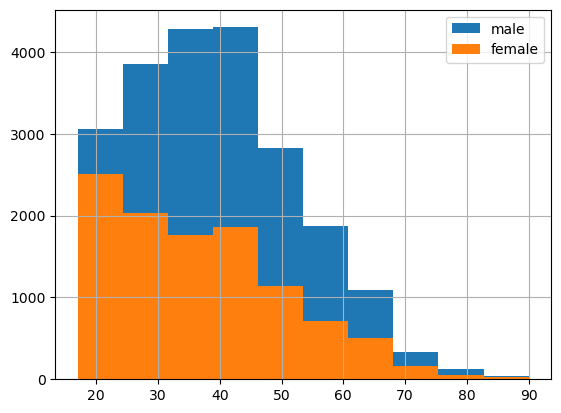

In [19]:
import matplotlib.pyplot as plt
ml_mu = ml['age'].mean()
fm_mu = fm['age'].mean()
ml_var = ml['age'].var()
fm_var = fm['age'].var()
ml_std = ml['age'].std()
fm_std = fm['age'].std()

print ('Statistics of age for men: mu:', ml_mu, 'var:', ml_var, 'std:', ml_std)
print ('Statistics of age for women: mu:', fm_mu, 'var:', fm_var, 'std:', fm_std)
ml['age'].hist(label='male')
fm['age'].hist(label='female')
plt.legend()

Statistics of hours per week for men: mu: 42.42808627810923 var: 146.88846717142022 std: 12.119755243874367
Statistics of hours per week for women: mu: 36.410361154953115 var: 139.50679700047252 std: 11.81129954748725


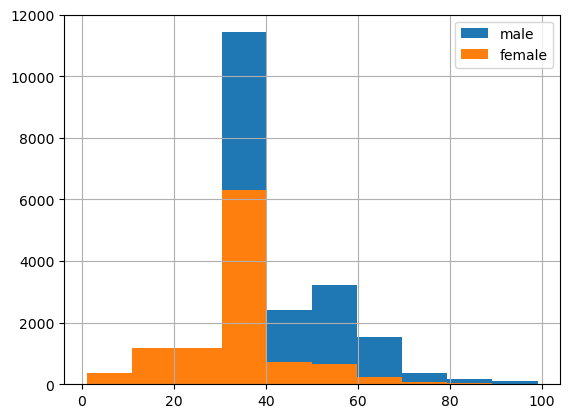

In [20]:
ml_mu_hr = ml['hr_per_week'].mean()
fm_mu_hr = fm['hr_per_week'].mean()
ml_var_hr = ml['hr_per_week'].var()
fm_var_hr = fm['hr_per_week'].var()
ml_std_hr = ml['hr_per_week'].std()
fm_std_hr = fm['hr_per_week'].std()

print ('Statistics of hours per week for men: mu:', ml_mu_hr, 'var:', ml_var_hr, 'std:', ml_std_hr)
print ('Statistics of hours per week for women: mu:', fm_mu_hr, 'var:', fm_var_hr, 'std:', fm_std_hr)
ml['hr_per_week'].hist(label='male')
fm['hr_per_week'].hist(label='female')
plt.legend()

### Question 9.  
Describe and explain the result.

**Answer:** from the results and the histogram it can be observed that:
* The ages of both men and women are widely spread in the dataset ranging from about 17-90 as shown by the high variance. 
* The average age of males is approximately 40 years while that of females is approximately 37 years. 
* The standard deviation for both genders is quite low. Most of the ages are concentrated around the mean. 
* The is a significant amount of variance in the number of hours worked ranging from 0-100 hours per week for both genders.  
* The average no. of hours worked males is approximately 42 hours while that of females is approximately 36 years.  
* Similarly, the standard deviation of weekly hours worked is low i.e. the number of hours worked for both genders is mostly concentrated near the mean.  

#### 4.2.1.3 Sample Median

What will happen if in the sample set there is an error with a value
very different from the rest? For example, considering hours worked per
week, it would normally be in a range between 20 and 80; but what would
happen if by mistake there was a value of 1000? An item of data that is
significantly different from the rest of the data is called an
*outlier*. In this case, the mean, μ, will be drastically changed
towards the outlier. One solution to this drawback is offered by the
statistical *median*, μ12, which is an order statistic giving the middle
value of a sample. In this case, all the values are ordered by their
magnitude and the median is defined as the value that is in the middle
of the ordered list. Hence, it is a value that is much more robust in
the face of outliers.

Let us see, the median age of working men and women in our dataset and
the median age of high-income men and women:

In [21]:
ml_median= ml['age'].median()
fm_median= fm['age'].median()

print ("Median age per men and women: ", ml_median, fm_median)

Median age per men and women:  38.0 35.0


In [22]:
ml_median_age= ml1['age'].median()
fm_median_age= fm1['age'].median()

print ("Median age per men and women with high-income: ", ml_median_age, fm_median_age)

Median age per men and women with high-income:  44.0 41.0


In [23]:
ml_median_hr= ml['hr_per_week'].median()
fm_median_hr= fm['hr_per_week'].median()
print ("Median hours per week per men and women: ", ml_median_hr, fm_median_hr)

Median hours per week per men and women:  40.0 40.0


### Question 10.  
Describe and explain the result.

**Answer:** 
* The median value for both genders is close to the mean. This means there are no outliers in the age data. 
* The above statement also holds true for the class of men and women with high income. 
* Similarly, the median value for hours worked of both genders is also close to the mean. Therefore, there are no outliers in the data. 

#### 4.2.1.4 Quantiles and Percentiles

Order the sample {x<sub>i</sub>}, then find x<sub>p</sub> so that it
divides the data into two parts where:

-   a fraction p of the data values are less than or equal
    to x<sub>p</sub> and
-   the remaining fraction (1−p) are greater than x<sub>p</sub>.

That value x<sub>p</sub> is the pth-quantile, or 100×pth percentile.   
**5-number summary**: x<sub>min</sub>,Q<sub>1</sub>,Q<sub>2</sub>,Q<sub>3</sub>,x<sub>max</sub>,
where Q<sub>1</sub> is the 25×pth percentile, Q<sub>2</sub> is the
50×pth percentile and Q<sub>3</sub> is the 75×pth percentile.

#### 4.2.1.5 Data distributions

We can have a look at the data distribution, which describes how often
each value appears (i.e., what is its frequency).

The most common representation of a distribution is a *histogram*, which
is a graph that shows the frequency of each value. Let us show the age
of working men and women separately.



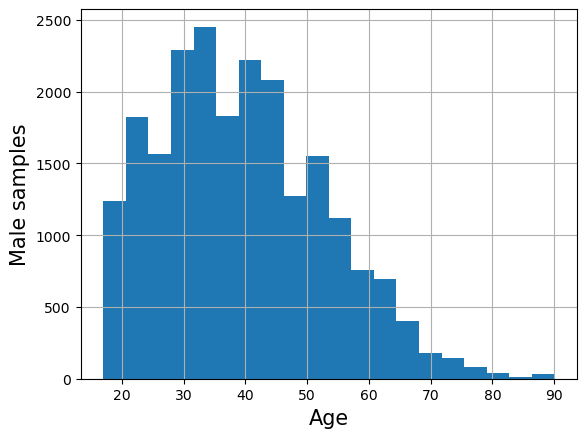

In [34]:
ml_age=ml['age']
ml_age.hist(histtype='stepfilled', bins=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Male samples',fontsize=15)
plt.show()

### Question 10.  
Show the graphics and explain the result.

**Answer:** 
* It can be seen that the age of males in the data is mostly concentrated between 17-55 years. 
* The peak frequencies are around 31-35 years old.  

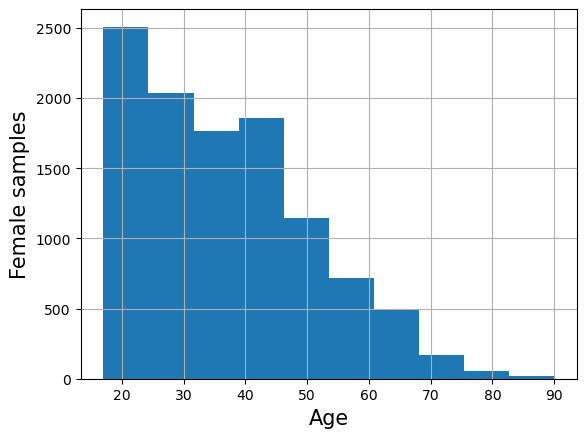

In [25]:
fm_age=fm['age']
fm_age.hist(histtype='stepfilled', bins=10)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Female samples',fontsize=15)
plt.show()

### Question 11.  
Show the graphics and explain the result.

**Answer:**
* It can be seen that the age of females in the data is concentrated around 17-45 years. 
* The peak frequencies are around 17-23 years old.

We can normalize the frequencies of the histogram by dividing/normalizing by n, the number of samples. The normalized histogram is called the Probability Mass Function (PMF).

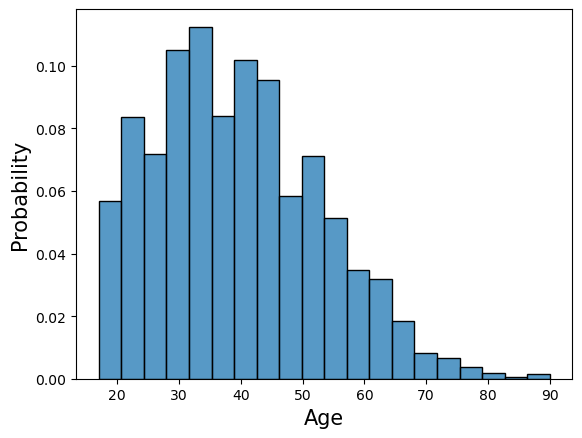

In [48]:
import seaborn as sns
sns.histplot(ml_age, stat='probability', bins=20);
plt.xlabel('Age',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.show()

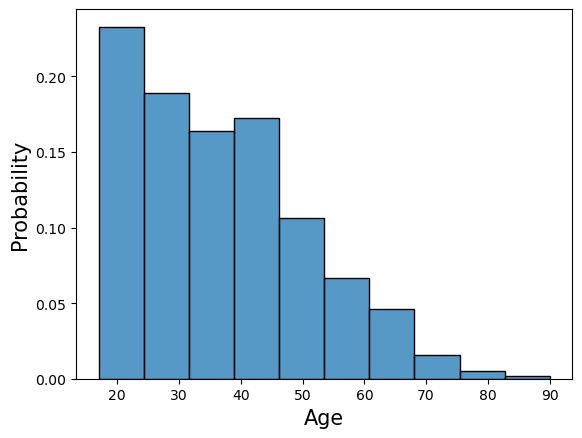

In [55]:
sns.histplot(fm_age, stat='probability', bins=10);
plt.xlabel('Age',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.show()

### Question 12.  
Show the graphics and explain the result.

**Answer:** by normalizing both histograms, it can be observed that the frequencies are now probabilities which shows the proportion of each histogram bin in the total dataset. Furthermore, the sum of the height of all the bars will be equal to 1. 

The Cumulative Distribution Function (CDF), or just distribution function, describes the probability that a real-valued random variable X with a given proba- bility distribution will be found to have a value less than or equal to x. Let us show the CDF of age distribution for both men and women.

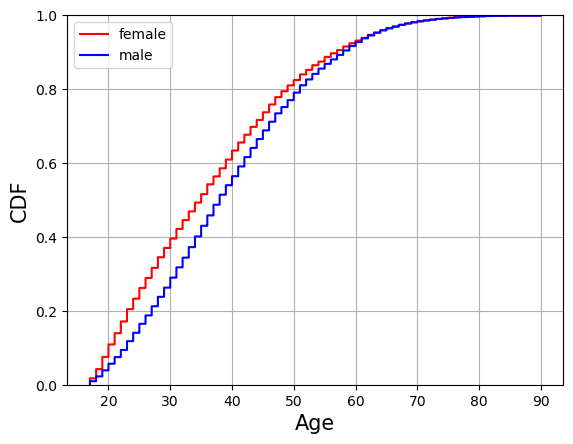

In [53]:
sns.ecdfplot(fm_age, stat='proportion', color='r', label='female')
sns.ecdfplot(ml_age, stat='proportion', color='b', label='male')
plt.xlabel('Age',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Question 13.  
Show the graphics and explain the result.

**Answer:** it can be observed that the CDF for both males and females is very similar. For any person chosen at random in the dataset, 
* The probability of having an age less than or equal to 90 is 100%.
* The probability of a male having an age less than 40 is 50%.
* The probability of a female having an age less than 35 is 50%.
* The probability of having an age less than 17 or greater than 90 is 0%. 

### 4.2.2 Data distributions

Summarizing can be dangerous: very different data can be described by
the same statistics. It must be validated by inspecting the data.

We can look at the **data distribution**, which describes how often
(frequency) each value appears.

We can normalize the frequencies of the histogram by
dividing/normalizing by n, the number of samples. The normalized
histogram is called **Probability Mass Function (PMF)**.

Let’s visualize and compare the MPF of male and female age in our
example:


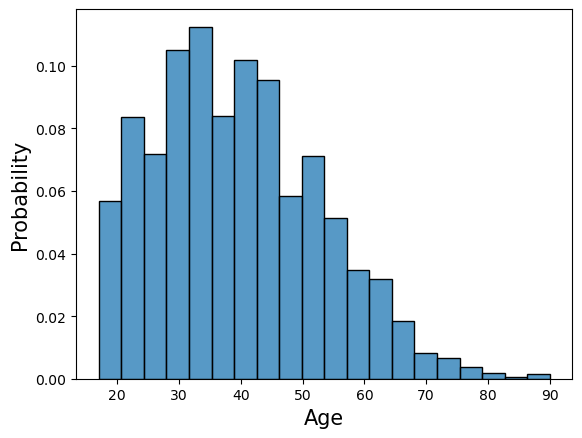

In [58]:
sns.histplot(ml_age, stat='probability', bins=20);
plt.xlabel('Age',fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()

### Question 14.  
Show the graphics and explain the result.

**Answer:** after normalizing, the plot now shoes the proportion of each bin in the entire dataset. It can be observed that a male between the ages 32-35 has the highest probability of being picked at random from our dataset. 

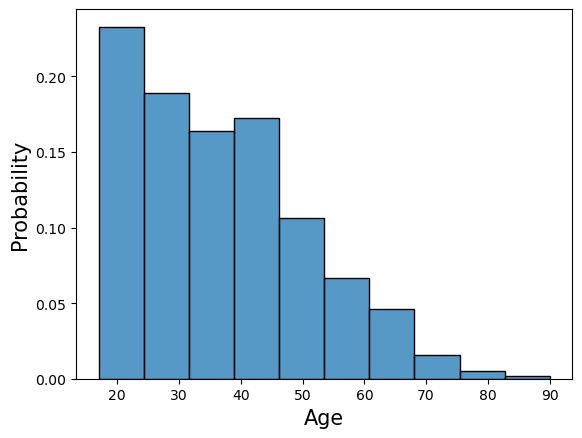

In [57]:
sns.histplot(fm_age, stat='probability', bins=10);
plt.xlabel('Age',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.show()

### Question 15.  
Show the graphics and explain the result.

**Answer:** similarly, after normalizing the female age dataset, the plot shows that a female aged 17-23 has the highest probability of being picked at random from our dataset. 

The **cumulative distribution function (CDF)**, or just distribution
function, describes the probability that a real-valued random variable X
with a given probability distribution will be found to have a value less
than or equal to x. For our example, the CDFs will be:

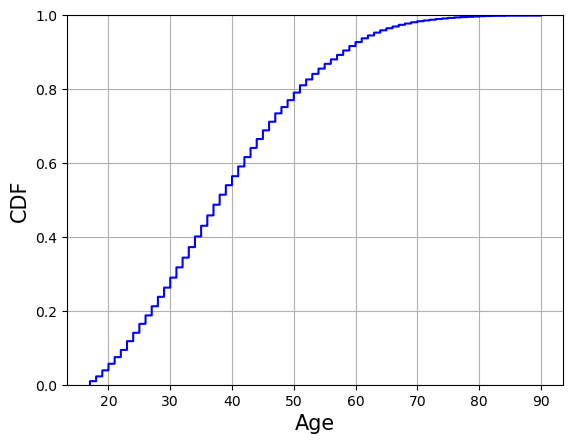

In [59]:
sns.ecdfplot(ml_age, stat='proportion', color='b')
plt.xlabel('Age',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.grid()
plt.show()

### Question 16.  
Show the graphics and explain the result.

**Answer:** For any male picked at random from the dataset, it can be seen from the plot that:
* The probability of having an age less than or equal to 90 is 100%.
* The probability of having an age less than 40 is approximately 55%.
* The probability of having an age less than 17 or greater than 90 is 0%. 

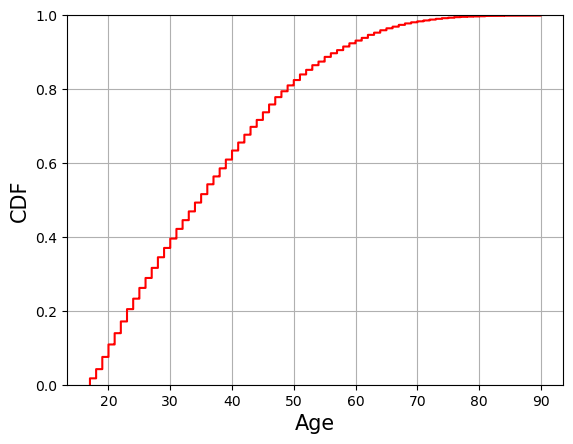

In [60]:
sns.ecdfplot(fm_age, stat='proportion', color='r')
plt.xlabel('Age',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.grid()
plt.show()

### Question 17.  
Show the graphics and explain the result.

**Answer:** For any female picked at random from the dataset, it can be seen from the plot that:
* The probability of having an age less than or equal to 90 is 100%.
* The probability of having an age less than 40 is approximately 60%.
* The probability of having an age less than 17 or greater than 90 is 0%. 

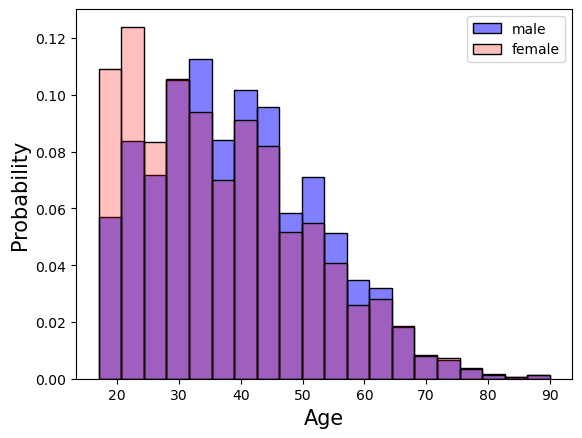

In [72]:
sns.histplot(ml_age, stat='probability', bins=20, color='b', label='male', alpha=0.5)
sns.histplot(fm_age, stat='probability', bins=20, color='r', label='female', alpha=0.25)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.legend()
plt.show()

### Question 18.  
Show the graphics and explain the result.

**Answer:** By comparing the two PMFs, it can be seen that the ages of both genders are distributed similarly and is mainly concentrated between the ages 17 and 55. 

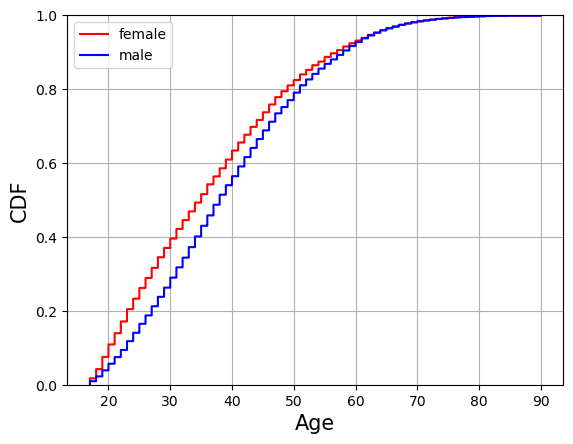

In [73]:
sns.ecdfplot(fm_age, stat='proportion', color='r', label='female')
sns.ecdfplot(ml_age, stat='proportion', color='b', label='male')
plt.xlabel('Age',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Question 19.  
Show the graphics and explain the result.

**Answer:** it can be observed that the CDF for both males and females is very similar. For any person chosen at random in the dataset, 
* The probability of having an age less than or equal to 90 is 100%.
* The probability of a male having an age less than 40 is 50%.
* The probability of a female having an age less than 35 is 50%.
* The probability of having an age less than 17 or greater than 90 is 0%. 

In [74]:
print ("The mean sample difference is ", ml_age.mean() - fm_age.mean())

The mean sample difference is  2.5753170652810553


### Question 20.  
Explain the result.

**Answer:** it means that on average, males in the dataset are approximately three years older than their female counterparts. 

### 4.2.3 Outliers

**Ouliers** are data samples with a value that is far from the central
tendency.

We can find outliers by:

-   Computing samples that are *far* from the median.
-   Computing samples whose value *exceeds the mean* by 2 or 3 standard
    deviations.

This expression will return a series of boolean values that you can then
index the series by:

In [75]:
df['age'].median()

37.0

#### 4.2.3.1 Outliner Treatment

For example, in our case, we are interested in the age statistics of men
versus women with high incomes and we can see that in our dataset, the
minimum age is 17 years and the maximum is 90 years. We can consider
that some of these samples are due to errors or are not representable.
Applying the domain knowledge, we focus on the median age (37, in our
case) up to 72 and down to 22 years old, and we consider the rest as
outliers.

Let’s see how many outliers we can detect in our example:

In [76]:
len(df[(df.income == '>50K\n') & (df['age'] < df['age'].median() - 15)])

5

In [77]:
len(df[(df.income == '>50K\n') & (df['age'] > df['age'].median() + 35)])

69

If we think that outliers correspond to errors, an option is to trim the data by discarting the highest and lowest values.

In [78]:
df2 = df.drop(df.index[(df.income=='>50K\n') & (df['age']>df['age'].median() +35) & (df['age'] > df['age'].median()-15)])

df2.shape

(32492, 15)

In [79]:
ml1_age=ml1['age']
fm1_age=fm1['age']

In [80]:
ml2_age = ml1_age.drop(ml1_age.index[(ml1_age >df['age'].median()+35) & (ml1_age>df['age'].median() - 15)])

fm2_age = fm1_age.drop(fm1_age.index[(fm1_age > df['age'].median()+35) & (fm1_age > df['age'].median()- 15)])

In [81]:
mu2ml = ml2_age.mean()
std2ml = ml2_age.std()
md2ml = ml2_age.median()

# Computing the mean, std, median, min and max for the high-income male population

print ("Men statistics: Mean:", mu2ml, "Std:", std2ml, "Median:", md2ml, "Min:", ml2_age.min(), "Max:",ml2_age.max())

Men statistics: Mean: 44.317982123920615 Std: 10.019749857171412 Median: 44.0 Min: 19 Max: 72


In [82]:
mu3ml = fm2_age.mean()
std3ml = fm2_age.std()
md3ml = fm2_age.median()

# Computing the mean, std, median, min and max for the high-income female population
print ("Women statistics: Mean:", mu2ml, "Std:", std2ml, "Median:", md2ml, "Min:", fm2_age.min(), "Max:",fm2_age.max())

Women statistics: Mean: 44.317982123920615 Std: 10.019749857171412 Median: 44.0 Min: 19 Max: 72


In [83]:
print ('The mean difference with outliers is: %4.2f.'% (ml_age.mean() - fm_age.mean()))
print ("The mean difference without outliers is: %4.2f."% (ml2_age.mean() - fm2_age.mean()))

The mean difference with outliers is: 2.58.
The mean difference without outliers is: 2.44.


Let us compare visually the age distributions before and after removing the outliers:

Text(0.5, 0, 'Samples')

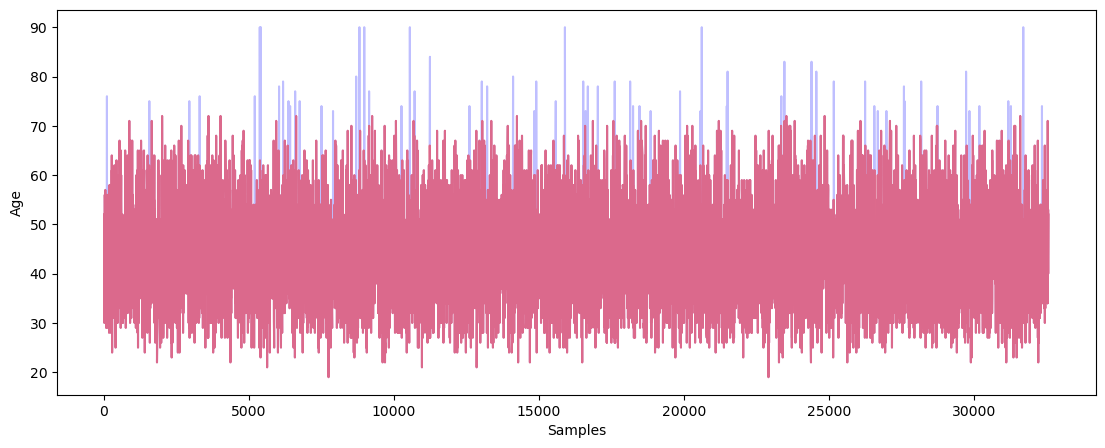

In [84]:
plt.figure(figsize=(13.4,5))

df.age[(df.income == '>50K\n')].plot(alpha=.25, color='blue')
df2.age[(df2.income == '>50K\n')].plot(alpha=.45,color='red')

plt.ylabel('Age')
plt.xlabel('Samples')

Let us see what is happening near the mode:

In [85]:
import numpy as np

countx,divisionx = np.histogram(ml2_age)
county,divisiony = np.histogram(fm2_age)

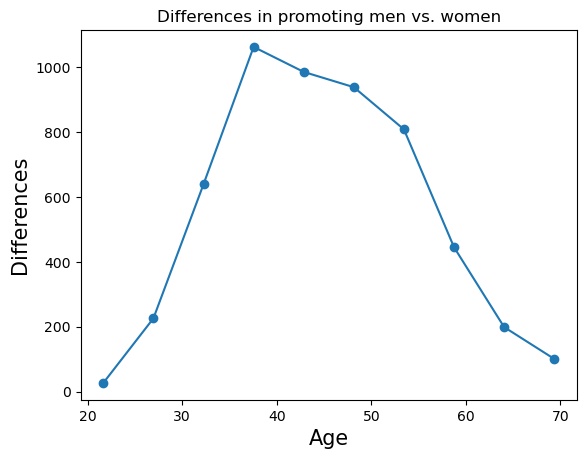

In [86]:
import matplotlib.pyplot as plt

val = [(divisionx[i]+divisionx[i+1])/2 for i in range(len(divisionx)-1)]

plt.plot(val, countx-county,'o-')
plt.title('Differences in promoting men vs. women')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Differences',fontsize=15)
plt.show()

There is still some evidence for our hypothesis!

In [87]:
print ("Remember:\n We have the following mean values for men, women and the difference:\nOriginally: ", ml_age.mean(), fm_age.mean(),  ml_age.mean()- fm_age.mean()) # The difference between the mean values of male and female populations.)
print ("For high-income: ", ml1_age.mean(), fm1_age.mean(), ml1_age.mean()- fm1_age.mean()) # The difference between the mean values of male and female populations.)
print ("After cleaning: ", ml2_age.mean(), fm2_age.mean(), ml2_age.mean()- fm2_age.mean()) # The difference between the mean values of male and female populations.)

print ("\nThe same for the median:")
print (ml_age.median(), fm_age.median(), ml_age.median()- fm_age.median()) # The difference between the mean values of male and female populations.)
print (ml1_age.median(), fm1_age.median(), ml1_age.median()- fm1_age.median()) # The difference between the mean values of male and female populations.)
print (ml2_age.median(), fm2_age.median(), ml2_age.median()- fm2_age.median()), # The difference between the mean values of male and female populations.)

Remember:
 We have the following mean values for men, women and the difference:
Originally:  39.43354749885268 36.85823043357163 2.5753170652810553
For high-income:  44.62578805163614 42.125530110262936 2.5002579413732064
After cleaning:  44.317982123920615 41.877028181041844 2.440953942878771

The same for the median:
38.0 35.0 3.0
44.0 41.0 3.0
44.0 41.0 3.0


(None,)

#### 4.2.1.7 Measuring Asymmetry

For univariate data, the formula for *skewness* is a statistic that
measures the asymmetry of the set of *n* data samples, *xi* :

![Skewness](http://vargas-solar.com/data-centric-smart-everything/wp-content/uploads/sites/42/2018/09/standardDeviation.png)

where μ is the mean, σ is the standard deviation, and *n* is the number of
data points. The numerator is the mean squared deviation (or variance)
and the denominator the mean cubed deviation.

Negative deviation indicates that the distribution “skews left” (it
extends further to the left than to the right). One can easily see that
the skewness for a normal distribution is zero, and any symmetric data
must have a skewness of zero. Note that skewness can be affected by
outliers! A simpler alternative is to look at the relationship between
the mean μ and the median μ <sub>1/2</sub>.

In [88]:
def skewness(x):
    res=0
    m=x.mean()
    s=x.std()
    for i in x:
        res+=(i-m)*(i-m)*(i-m)
    res/=(len(x)*s*s*s)
    return res

print ("The skewness of the male population is:", skewness(ml2_age))
print ("The skewness of the female population is:", skewness(fm2_age))

The skewness of the male population is: 0.2664443838432819
The skewness of the female population is: 0.38633352491285977


### Question 21.  
Explain the result.

**Answer:** the results show a positive skewness for both the male and female population. This means that the histogram plot of both genders extends further to the right than to the left. This also means that the mean and median will be greater than the mode.

The **Pearson’s median skewness coefficient** is a more robust
alternative to the skewness coefficient and is defined as follows:

![Pearson's skewness](http://vargas-solar.com/data-centric-smart-everything/wp-content/uploads/sites/42/2018/09/skewness.png)

There are many other definitions for skewness that will not be discussed
here. In our case, if we check the Pearson’s skewness coefficient for
both men and women, we can see that the difference between them actually
increases:


In [89]:
def pearson(x):
    return 3*(x.mean()-x.median())/x.std()

print ("The Pearson's coefficient of the male population is:", pearson(ml2_age))
print ("The Pearson's coefficient of the female population is:", pearson(fm2_age))

The Pearson's coefficient of the male population is: 0.0952066054901639
The Pearson's coefficient of the female population is: 0.2621531209596965


#### 4.2.1.8 Relative Risk

Let’s say that a person is “early” promoted if he/she is promoted before
the age of 41, “on time” if he/she is promoted of age 41, 42, 43 or 44,
and “late” promoted if he/she is ascended to get income bigger than 50K
after being 44 years old. Let us compute the probability of being early,
on time and late promoted for men and women:

In [90]:
ml1 = df[(df.sex == 'Male')&(df.income=='>50K\n')]

ml2 = ml1.drop(ml1.index[(ml1['age']>df['age'].median() +35)&(ml1['age']> df['age'].median()- 15)])

fm2 = fm1.drop(fm1.index[(fm1['age']> df['age'].median() + 35)& (fm1['age']> df['age'].median() - 15)])

print (ml2.shape, fm2.shape)

(6601, 15) (1171, 15)


In [91]:
print ("Men grouped in 3 categories:")
print ("Young:",int(round(100*len(ml2_age[ml2_age<41])/float(len(ml2_age.index)))),"%.")
print ("Elder:", int(round(100*len(ml2_age[ml2_age >44])/float(len(ml2_age.index)))),"%.")
print ("Average age:", int(round(100*len(ml2_age[(ml2_age>40) & (ml2_age< 45)])/float(len(ml2_age.index)))),"%.")

Men grouped in 3 categories:
Young: 38 %.
Elder: 48 %.
Average age: 14 %.


In [92]:
print ("Women grouped in 3 categories:")
print ("Young:",int(round(100*len(fm2_age[fm2_age <41])/float(len(fm2_age.index)))),"%.")
print ("Elder:", int(round(100*len(fm2_age[fm2_age >44])/float(len(fm2_age.index)))),"%.")
print ("Average age:", int(round(100*len(fm2_age[(fm2_age>40) & (fm2_age< 45)])/float(len(fm2_age.index)))),"%.")

Women grouped in 3 categories:
Young: 48 %.
Elder: 37 %.
Average age: 15 %.


The relative risk is the ratio of two probabilities. In order to get the relative risk  of early promotion, we need to consider the fraction of both probabilities.

In [93]:
print ("The male mean:", ml2_age.mean())
print ("The female mean:", fm2_age.mean())

The male mean: 44.317982123920615
The female mean: 41.877028181041844


In [155]:
ml2_young = len(ml2_age[(ml2_age<41)])/float(len(ml2_age.index))
fm2_young  = len(fm2_age[(fm2_age<41)])/float(len(fm2_age.index))
print ("The relative risk of female early promotion is: ", 100*(1-ml2_young/fm2_young))

The relative risk of female early promotion is:  21.125440082163816


In [157]:
len(ml2_age.index)

6601

In [95]:
ml2_elder = len(ml2_age[(ml2_age>44)])/float(len(ml2_age.index))
fm2_elder  = len(fm2_age[(fm2_age>44)])/float(len(fm2_age.index))
print ("The relative risk of male late promotion is: ", 100*ml2_elder/fm2_elder)

The relative risk of male late promotion is:  128.9715708971242


### Discussion

After exploring the data, we obtained some apparent effects that support
our initial assumptions. For example, the mean age for men in our
dataset is 39.4 years; while for women, is 36.8 years. When analyzing
the high-income salaries, the mean age for men increased to 44.6 years;
while for women, increased to 42.1 years. When the data were cleaned
from outliers, we obtained mean age for high-income men: 44.3, and for
women: 41.8. Moreover, histograms and other statistics show the skewness
of the data and the fact that women used to be promoted a little bit
earlier than men, in general.

### 4.2.5 Continuous Distribution

The distributions we have considered up to now are based on empirical
observations and thus are called *empirical distributions*. As an
alternative, we may be interested in considering distributions that are
defined by a continuous function and are called *continuous
distributions*.

#### 4.2.5.1 Exponential distribution

The CDF of the exponential distribution is:

CDF(x)=1−exp<sup>−λx</sup>

And its PDF is:

PDF(x)=λexp<sup>−λx</sup>

The parameter λ determines the shape of the distribution, the mean of
the distribution is 1/λ and its variance is 1/λ<sup>2</sup>. The median
is ln(2)/λ.

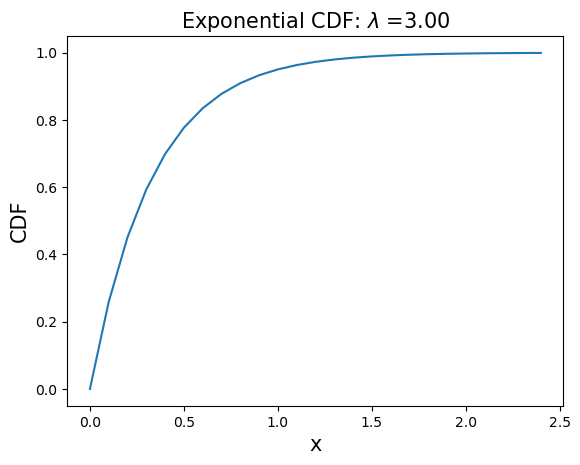

In [96]:
l = 3
x=np.arange(0,2.5,0.1)
y= 1- np.exp(-l*x)

plt.plot(x,y,'-')
plt.title('Exponential CDF: $\lambda$ =%.2f'% l ,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

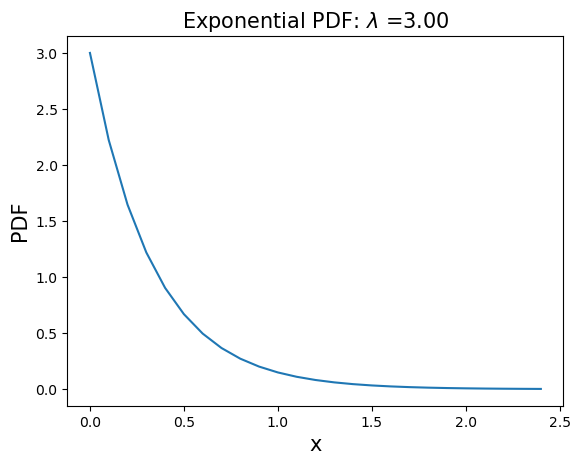

In [97]:
from __future__ import division
import scipy.stats as stats

l = 3
x=np.arange(0,2.5,0.1)
y= l * np.exp(-l*x)

plt.plot(x,y,'-')
plt.title('Exponential PDF: $\lambda$ =%.2f'% l, fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.show()

There are a lot of real world events that can be described with
this distribution.

-   The time until a radioactive particle decays,
-   The time it takes before your next telephone call,
-   The time until default (on payment to company debt holders) in
    reduced form credit risk modeling.

The random variable X of the life lengths of some batteries is
associated with a probability density function of the form:

![PDF](http://vargas-solar.com/data-centric-smart-everything/wp-content/uploads/sites/42/2018/09/PDF.png)

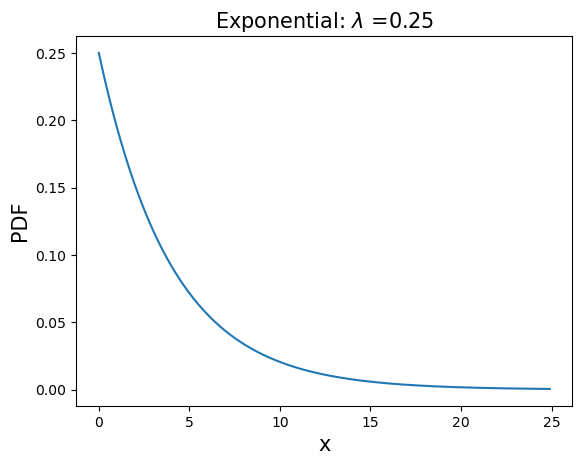

In [98]:
l = 0.25

x=np.arange(0,25,0.1)
y= l * np.exp(-l*x)

plt.plot(x,y,'-')
plt.title('Exponential: $\lambda$ =%.2f' %l ,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('PDF',fontsize=15)
plt.show()

#### <span lang="EN-US">4.2.5.2 Normal distribution</span>
<span lang="EN-US">The<span
class="apple-converted-space"> </span>**normal, or Gaussian
distribution**<span class="apple-converted-space"> </span>is the most
used one because it describes a lot of phenomena and because it is
amenable for analysis.<span
class="apple-converted-space"> </span></span>

<span lang="EN-US">Its CDF has no closed-form expression and its more
common representation is the PDF:</span>

![Normal distribution](http://vargas-solar.com/data-centric-smart-everything/wp-content/uploads/sites/42/2018/09/gaussian.png)

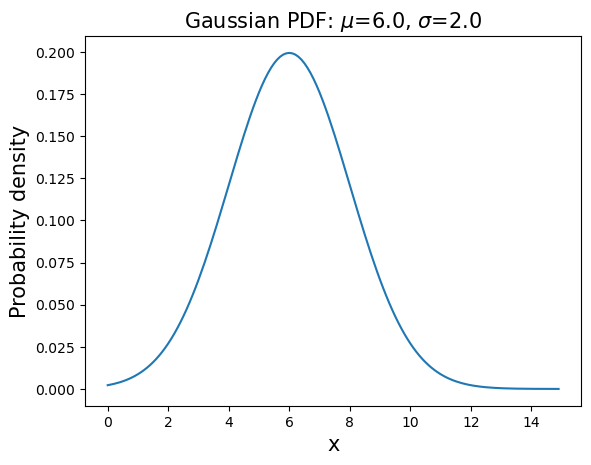

In [99]:
u=6 # mean
s=2 # standard deviation

x=np.arange(0,15,0.1)

y=(1/(np.sqrt(2*np.pi*s*s)))*np.exp(-(((x-u)**2)/(2*s*s)))

plt.plot(x,y,'-')
plt.title('Gaussian PDF: $\mu$=%.1f, $\sigma$=%.1f'%(u,s),fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15)
plt.show()

Examples:

-   Measures of size of living tissue (length, height, skin area,
    weight);
-   The length of inert appendages (hair, claws, nails, teeth) of
    biological specimens, in the direction of growth; presumably the
    thickness of tree bark also falls under this category;
-   Certain physiological measurements, such as blood pressure of adult
    humans.

#### 4.2.5.3 Central limit theorem

The normal distribution is also important, because it is involved in the
Central Limit Theorem:

Take the mean of n random samples from ANY arbitrary distribution with
a well-defined standard deviation σ and mean μ. As n gets bigger
the **distribution of the sample mean** will always converge to a
Gaussian (normal) distribution with mean μ and standard deviation σn√.

Colloquially speaking, the theorem states the distribution of an average
tends to be normal, even when the distribution from which the average is
computed is decidedly non-normal. This explains the ubiquity of the
Gaussian distribution in science and statistics.

#### Example: Uniform Distribution

The uniform distribution is obviously non-normal. Let us call it
the parent distribution.

To compute an average, two samples are drawn (n=2), at random, from the
parent distribution and averaged. Then another sample of two is drawn
and another value of the average computed. This process is repeated,
over and over, and averages of two are computed.

Repeatedly taking more elements (n=3,4…) from the parent distribution,
and computing the averages, produces a normal probability density.

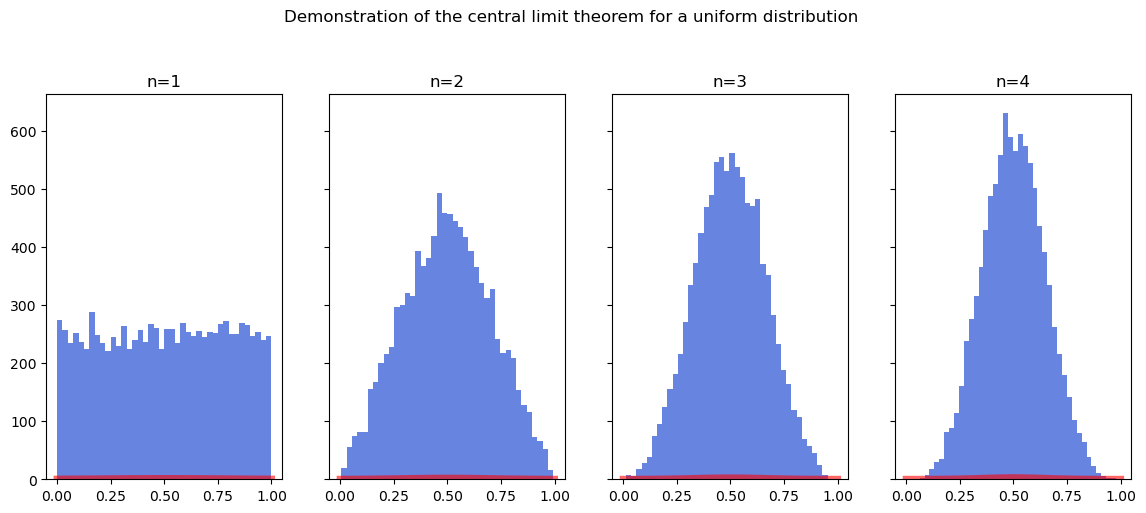

In [100]:
fig, ax = plt.subplots(1, 4, sharey=True, squeeze=True, figsize=(14, 5))
x = np.linspace(0, 1, 100)
for i in range(4):
    f = np.mean(np.random.random((10000, i+1)), 1)
    m, s = np.mean(f), np.std(f, ddof=1)
    fn = (1/(s*np.sqrt(2*np.pi)))*np.exp(-(x-m)**2/(2*s**2))  # normal pdf            
    ax[i].hist(f, 40, color=[0, 0.2, .8, .6]) 
    ax[i].set_title('n=%d' %(i+1))
    ax[i].plot(x, fn, color=[1, 0, 0, .6], linewidth=5)
plt.suptitle('Demonstration of the central limit theorem for a uniform distribution', y=1.05)
plt.show()

### 4.2.6      Kernel Density

In many real problems, we may not be interested in the parameters of a
particular distribution of data, but just a continuous representation of
the data. In this case, we should estimate the distribution
non-parametrically (i.e., making no assumptions about the form of the
underlying distribution) using kernel density estimation.

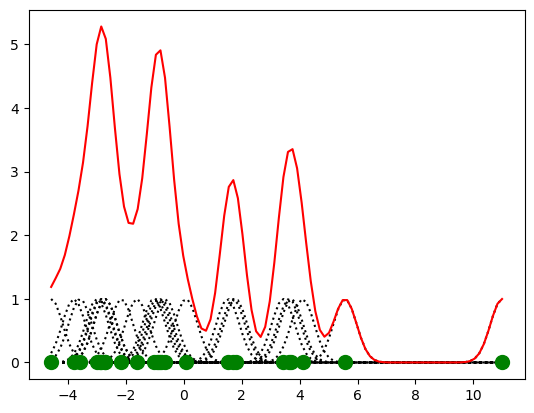

In [101]:
from scipy.stats.distributions import norm

# Some random data
y = np.random.random(15) * 10
x = np.linspace(0, 10, 100)

x1 = np.random.normal(-1, 2, 15) # parameters: (loc=0.0, scale=1.0, size=None)
x2 = np.random.normal(6, 3, 10)
y = np.r_[x1, x2] # r_ Translates slice objects to concatenation along the first axis.
x = np.linspace(min(y), max(y), 100)

# Smoothing parameter
s = 0.4

# Calculate the kernels
kernels = np.transpose([norm.pdf(x, yi, s) for yi in y])

plt.plot(x, kernels, 'k:')
plt.plot(x, kernels.sum(1), 'r')
plt.plot(y, np.zeros(len(y)), 'go', ms=10)

Let us imagine that we have a set of data measurements without knowing their distribution and we need to estimate the continuous representation of their distribution. In this case, we can consider a Gaussian kernel to generate the density around the data. Let us consider a set of random data generated by a bimodal normal distribution. If we consider a Gaussian kernel around the data, the sum of those kernels can give us a continuous function that when normalized would approximate the density of the distribution:

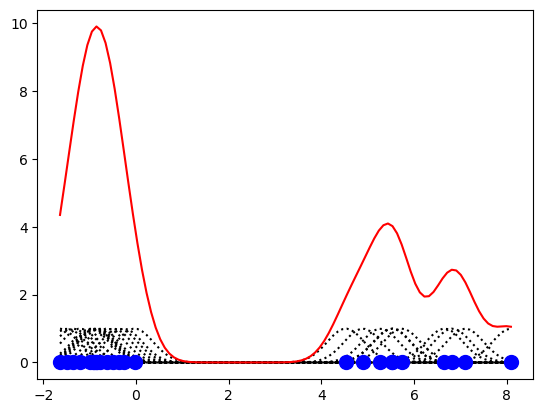

In [103]:
from scipy.stats import gaussian_kde

x1 = np.random.normal(-1, 0.5, 15)

# parameters: (loc=0.0, scale=1.0, size=None)

x2 = np.random.normal(6, 1, 10)
y = np.r_[x1, x2]

# r_ Translates slice objects to concatenation along the first axis.

x = np.linspace(min(y), max(y), 100)
s = 0.4   # Smoothing parameter

kernels = np.transpose([norm.pdf(x, yi, s) for yi in y])

# Calculate the kernels
density = gaussian_kde(y)

plt.plot(x, kernels, 'k:')
plt.plot(x, kernels.sum(1), 'r')
plt.plot(y, np.zeros(len(y)), 'bo', ms=10)

### Question 22.  
What does the figure shows?

**Answer:**
* The blue dots show the random samples drawn from two normal distributions.
* The dotted black curves show the plot of the kernels (obtained from PDF) for each of the samples. It can be observed that the peak of the curves coincides with the blue dots. 
* The red curve gives a sum of the kernels

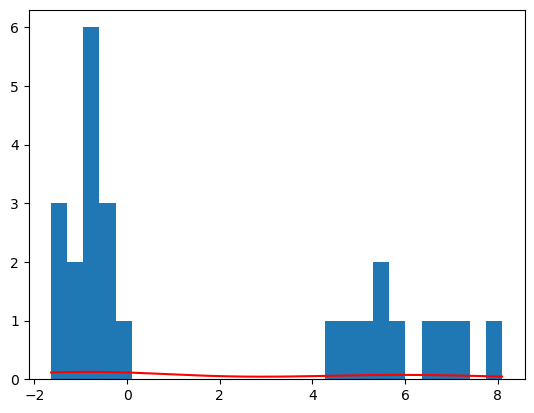

In [114]:
xgrid = np.linspace(x.min(), x.max(), 200)
plt.hist(y, bins=28)
plt.plot(xgrid, density(xgrid), 'r-')

SciPy implements a Gaussian KDE that automatically chooses an appropriate bandwidth. Let’s create a bi-modal distribution of data that is not easily summarized by a parametric distribution:

(array([2., 1., 0., 1., 2., 6., 4., 0., 2., 1., 1., 2., 1., 1., 0., 0., 0.,
        1.]),
 array([-5.28612472, -4.25937877, -3.23263282, -2.20588687, -1.17914092,
        -0.15239497,  0.87435098,  1.90109693,  2.92784288,  3.95458883,
         4.98133478,  6.00808073,  7.03482668,  8.06157263,  9.08831858,
        10.11506453, 11.14181048, 12.16855643, 13.19530238]),
 <BarContainer object of 18 artists>)

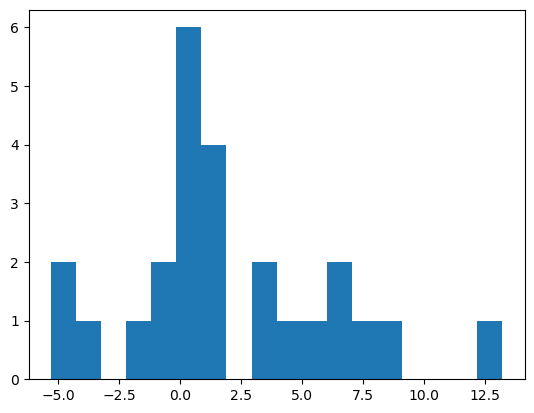

In [115]:
# Create a bi-modal distribution with a mixture of Normals.

x1 = np.random.normal(-1, 2, 15) # parameters: (loc=0.0, scale=1.0, size=None)
x2 = np.random.normal(6, 3, 10)

# Append by row
x = np.r_[x1, x2]

# r_ Translates slice objects to concatenation along the first axis.
plt.hist(x, bins=18)

In fact, the library SciPy3 implements a Gaussian kernel density estimation that automatically chooses the appropriate bandwidth parameter for the kernel. Thus, the final construction of the density estimate will be obtained by:

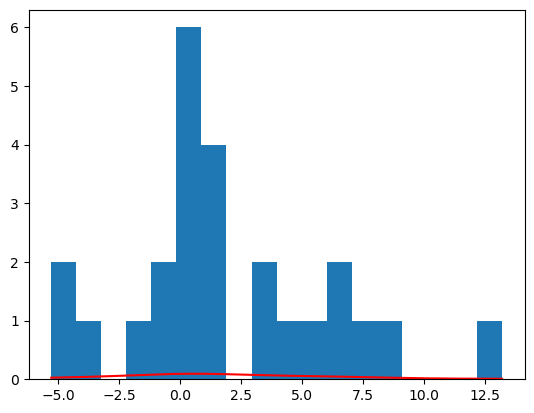

In [117]:
density = gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), 200)
plt.hist(x, bins=18)
plt.plot(xgrid, density(xgrid), 'r-')

### 4.2     Estimation

An important aspect when working with statistical data is being able to
use estimates to approximate the values of unknown parameters of the
dataset. In this section, we will review different kinds of estimators
(estimated mean, variance, standard score, etc.).

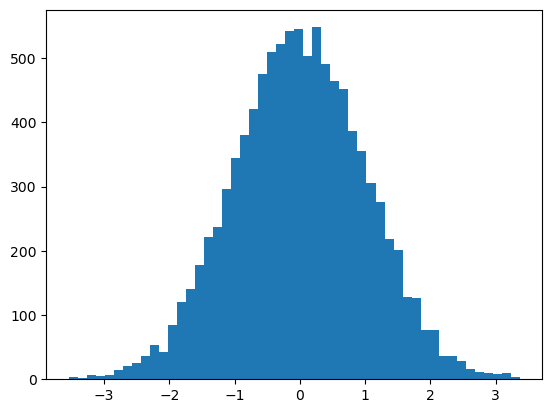

In [118]:
x = np.random.normal(0.0, 1.0, 10000)
a = plt.hist(x,50)

**Definition:** *Estimation* is the process of inferring the parameters
(e.g. mean) of a distribution from a statistic of samples drown from a
population.

For example: What is the estimated mean μ̂ of the following normal data?

We can use our definition of empirical mean:

In [119]:
print ('The empirical mean of the sample is ', x.mean())

The empirical mean of the sample is  -0.0021104005324682766


### 4.3.1 Sample and Estimated Mean, Variance and Standard Scores

In continuation, we will deal with point estimators that are single
numerical estimates of parameters of a population.

#### 4.3.1.1 Mean

Let us assume that we know that our data are coming from a normal
distribution and the random samples drawn are as follows:

{0.33, −1.76, 2.34, 0.56, 0.89}.

The question is can we guess the mean μ of the distribution? One
approximation is given by the sample mean, x ̄. This process is called
estimation and the statistic (e.g., the sample mean) is called an
estimator. In our case, the sample mean is 0.472, and it seems a logical
choice to represent the mean of the distribution. It is not so evident
if we add a sample with a value of −465. In this case, the sample mean
will be −77.11, which does not look like the mean of the distribution.
The reason is due to the fact that the last value seems to be an outlier
compared to the rest of the sample. In order to avoid this effect, we
can try first to remove outliers and then to estimate the mean; or we
can use the sample median as an estimator of the mean of the
distribution. If there are no outliers, the sample mean x ̄ minimizes
the following mean squared error:

![MSE](http://vargas-solar.com/data-centric-smart-everything/wp-content/uploads/sites/42/2018/09/MSE.png)

where n is the number of times we estimate the mean. Let us compute the
MSE of a set of random data:

In [120]:
NTs=200
mu=0.0
var=1.0
err = 0.0
NPs=1000
for i in range(NTs):
    x = np.random.normal(mu, var, NPs)
    err += (x.mean()-mu)**2

print ('MSE: ', err/NTs)

MSE:  0.00109307175961488


### Question 23.  
What do you obtained as result?

**Answer:** We obtained a mean squared error of approximately 0. This means the majority of the samples in our distribution are very close to the mean. 

#### 4.3.1.2 Variance

We can also estimate the variance with:

σ̂ <sup>2</sup>=1n∑<sub>i</sub>(x<sub>i</sub>−μ)<sup>2</sup>

This estimator works for large samples, but it is biased for small
samples. We can use this one:

σ̂ <sup>2n−1</sup>=1n−1∑<sub>i</sub>(x<sub>i</sub>−μ)<sup>2</sup>

#### 4.3.1.3 Standard scores

z<sub>i</sub>=x<sub>i</sub>−μ/σ

This measure is dimensionless and its distribution has mean 0 and
variance 1.

It inherits the “shape” of X: if it is normally distributed, so is Z.
If X is skewed, so is Z.

#### 4.3.1.4 Covariance

**Covariance** is a measure of the tendency of two variables to vary
together.

If we have two
series X and Y with X={x<sub>i</sub>} and Y={y<sub>i</sub>}, and they
vary together, their
deviations x<sub>i</sub>−μ<sub>X</sub> and y<sub>i</sub>−μ<sub>Y</sub> tend
to have the same sign.

If we multiply them together, the product is positive, when the
deviations have the same sign, and negative, when they have the opposite
sign. So, adding up the products gives a measure of the tendency to vary
together.

Covariance is the mean of the products:

![Covariance](http://vargas-solar.com/data-centric-smart-everything/wp-content/uploads/sites/42/2018/09/cov.png)

where n is the length of the two series.

It is a measure that is difficult to interpret.

In [121]:
def Cov(X, Y):
    def _get_dvis(V):
        return [v - np.mean(V) for v in V]
    dxis = _get_dvis(X)
    dyis = _get_dvis(Y)
    return np.sum([x * y for x, y in zip(dxis, dyis)])/len(X)


X = [5, -1, 3.3, 2.7, 12.2]
X= np.array(X)
Y = [10, 12, 8, 9, 11]

print ("Cov(X, X) = %.2f" % Cov(X, X))
print ("Var(X) = %.2f" % np.var(X))

print ("Cov(X, Y) = %.2f" % Cov(X, Y))

Cov(X, X) = 18.89
Var(X) = 18.89
Cov(X, Y) = 0.18


Let us create some examples of positive and negative correlations like those showing the relations of stock market with respect to the economic growth or the gasoline prices with respect to the world oil production:

In [122]:
MAXN=100
MAXN=40

X=np.array([[1,9],[3, 2], [5,3],[5.5,4],[6,4],[6.5,4],[7,3.5],[7.5,3.8],[8,4],
[8.5,4],[9,4.5],[9.5,7],[10,9],[10.5,11],[11,11.5],[11.5,12],[12,12],[12.5,12],[13,10]])

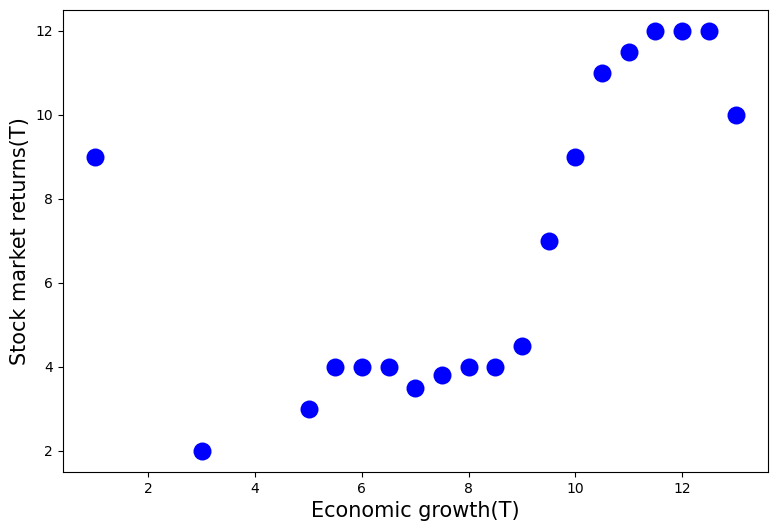

In [123]:
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='b',s=120, linewidths=2,zorder=10)
plt.xlabel('Economic growth(T)',fontsize=15)
plt.ylabel('Stock market returns(T)',fontsize=15)
plt.gcf().set_size_inches((20,6))

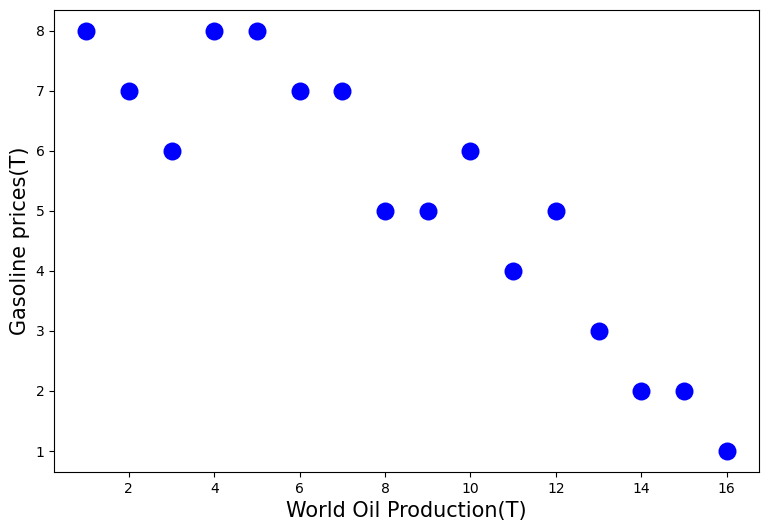

In [124]:
X=np.array([[1,8],[2, 7], [3,6],[4,8],[5,8],[6,7],[7,7],[8,5],[9,5],[10,6],[11,4],[12,5],[13,3],[14,2],[15,2],[16,1]])

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='b',s=120, linewidths=2,zorder=10)
plt.xlabel('World Oil Production(T)',fontsize=15)
plt.ylabel('Gasoline prices(T)',fontsize=15)
plt.gcf().set_size_inches((20,6))

#### 4.3.1.5 Pearson’s correlation

Shall we consider the variance? An alternative is to divide the
deviations by σ, which yields standard scores, and compute the product
of standard scores:

![Pearson PI](http://vargas-solar.com/data-centric-smart-everything/wp-content/uploads/sites/42/2018/09/pearsonpi.png)

The mean of these products is:

![Pearson Rho](http://vargas-solar.com/data-centric-smart-everything/wp-content/uploads/sites/42/2018/09/ropearson.png)

Or we can rewrite ρ by factoring out σX and σY:

In [125]:
def Corr(X, Y):
    assert len(X) == len(Y)
    return Cov(X, Y) / np.prod([np.std(V) for V in [X, Y]])

print ("Corr(X, X) = %.5f" % Corr(X, X))

Y=np.random.random(len(X))

print ("Corr(X, Y) = %.5f" % Corr(X, Y))

Corr(X, X) = 2.00000
Corr(X, Y) = -0.01496


When ρ=0, we cannot say that there is no relationship between the
variables!

Pearson’s coefficient only measures **linear** correlations!

#### 4.3.2.6 Spearsman’s rank correlation

Pearson’s correlation works well if the relationship between variables
is linear and if the variables are roughly normal. But it is not robust
in the presence of **outliers**.

Spearman’s rank correlation is an alternative that mitigates the effect
of outliers and skewed distributions. To compute Spearman’s correlation,
we have to compute the rank of each value, which is its index in the
sorted sample.

For example, in the sample {7, 1, 2, 5} the rank of the value 5 is 3,
because it appears third if we sort the elements.

Then, we compute the Pearson’s correlation, **but for the ranks**.

ranks:  [4.0, 1.0, 2.0, 3.0]
Pearson rank coefficient: 0.28
Spearman rank coefficient: 0.80


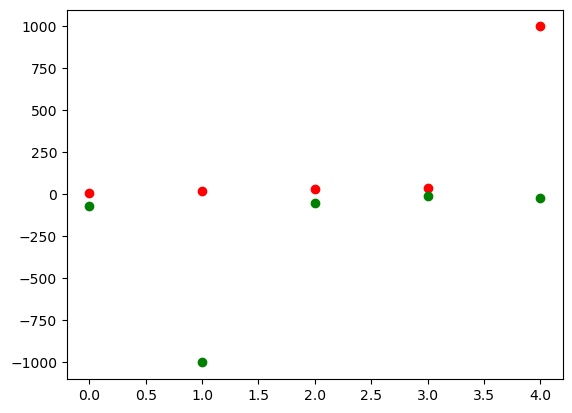

In [126]:
def list2rank(l):
    #l is a list of numbers
    # returns a list of 1-based index; mean when multiple instances
    return [np.mean([i+1 for i, sorted_el in enumerate(sorted(l)) if sorted_el == el]) for el in l]

l = [7, 1, 2, 5]
print ("ranks: ", list2rank(l))

def spearmanRank(X, Y):
    # X and Y are same-length lists
    print (list2rank(X) )
    print (list2rank(Y))
    return Corr(list2rank(X), list2rank(Y))

X = [10, 20, 30, 40, 1000]
Y = [-70, -1000, -50, -10, -20]
plt.plot(X,'ro')
plt.plot(Y,'go')

print ("Pearson rank coefficient: %.2f" % Corr(X, Y))
print ("Spearman rank coefficient: %.2f" % spearmanRank(X, Y))

In [148]:
X=np.array([[10.0, 8.04,10.0, 9.14, 10.0, 7.46, 8.0, 6.58],
[8.0,6.95, 8.0, 8.14, 8.0, 6.77, 8.0, 5.76],
[13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71],
[9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84],
[11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47],
[14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04],
[6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25],
[4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50],
[12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56],
[7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91],
[5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.89]])

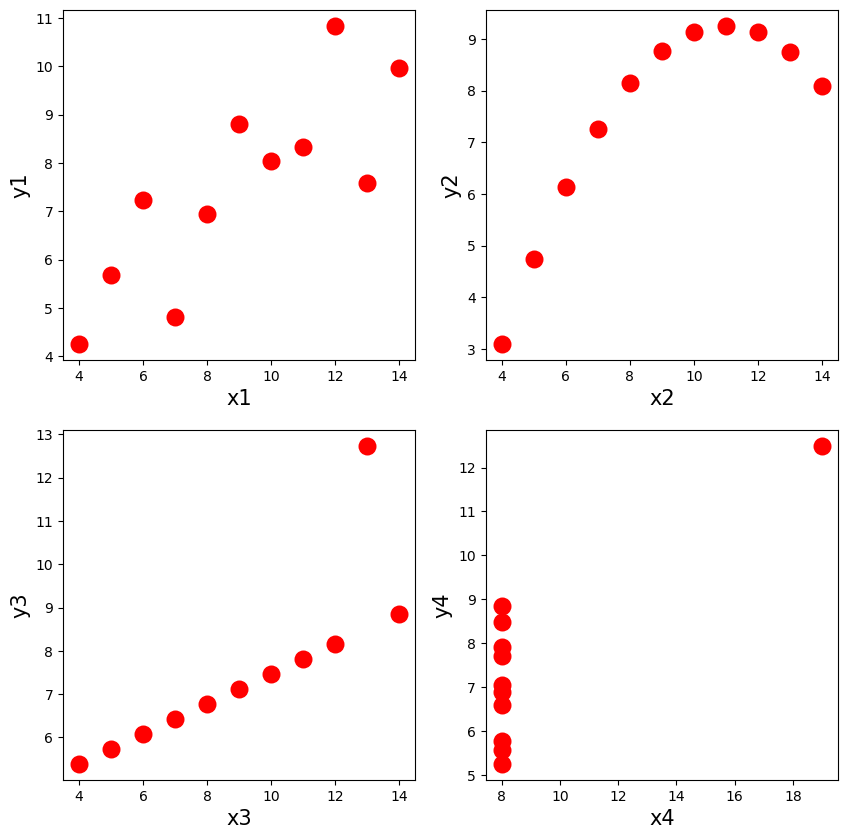

In [149]:
plt.subplot(2,2,1)
plt.scatter(X[:,0],X[:,1],color='r',s=120, linewidths=2,zorder=10)
plt.xlabel('x1',fontsize=15)
plt.ylabel('y1',fontsize=15)

plt.subplot(2,2,2)
plt.scatter(X[:,2],X[:,3],color='r',s=120, linewidths=2,zorder=10)
plt.xlabel('x2',fontsize=15)
plt.ylabel('y2',fontsize=15)
plt.subplot(2,2,3)
plt.scatter(X[:,4],X[:,5],color='r',s=120, linewidths=2,zorder=10)
plt.xlabel('x3',fontsize=15)
plt.ylabel('y3',fontsize=15)

plt.subplot(2,2,4)
plt.scatter(X[:,6],X[:,7],color='r',s=120, linewidths=2,zorder=10)
plt.xlabel('x4',fontsize=15)
plt.ylabel('y4',fontsize=15)
plt.gcf().set_size_inches((10,10))

### Question 24.  
Obtain for the Anscombe's quartet given in the figures above, the different estimators (mean, variance, covariance for each pair, Pearson's correlation and Spearman's rank correlation.

**Answer:** as shown in the code cells below, all four members of the quartet have nearly identical mean, variance, covariance and correlation despite having different distributions and visualization. This shows the importance of visualizing data when analyzing it and the impact of outlier on statistical metrics. 

In [150]:
fig1 = list(zip(X[:,0],X[:,1]))
fig2 = list(zip(X[:,2],X[:,3]))
fig3 = list(zip(X[:,4],X[:,5]))
fig4 = list(zip(X[:,6],X[:,7]))

def get_metrics(input):
    x = []
    y = []
    for i in input:
        x.append(i[0])
        y.append(i[1])
    print(f'Mean of X: {np.mean(x)}')
    print(f'Mean of Y: {np.mean(y)}')
    print(f'Variance of X: {np.var(x)}')
    print(f'Variance of Y: {np.var(y)}')
    print(f'Covariance of X & Y: {Cov(x, y)}')
    print(f'Pearson\'s correlation: {Corr(x, y)}')
    print(f'Spearman\'s rank correlation: {spearmanRank(x, y)}')

In [151]:
# printing metrics for the first quartet
print('Metrics for the first of Anscombe\'s quartet')
get_metrics(fig1)

Metrics for the first of Anscombe's quartet
Mean of X: 9.0
Mean of Y: 7.500909090909093
Variance of X: 10.0
Variance of Y: 3.7520628099173554
Covariance of X & Y: 5.000909090909091
Pearson's correlation: 0.8164205163448399
Spearman's rank correlation: 0.818181818181818


In [152]:
# printing metrics for the second quartet
print('Metrics for the second of Anscombe\'s quartet')
get_metrics(fig2)

Metrics for the second of Anscombe's quartet
Mean of X: 9.0
Mean of Y: 7.50090909090909
Variance of X: 10.0
Variance of Y: 3.752390082644628
Covariance of X & Y: 4.999999999999999
Pearson's correlation: 0.8162365060002426
Spearman's rank correlation: 0.6909090909090908


In [153]:
# printing metrics for the third quartet
print('Metrics for the third of Anscombe\'s quartet')
get_metrics(fig3)

Metrics for the third of Anscombe's quartet
Mean of X: 9.0
Mean of Y: 7.5
Variance of X: 10.0
Variance of Y: 3.747836363636364
Covariance of X & Y: 4.997272727272727
Pearson's correlation: 0.8162867394895982
Spearman's rank correlation: 0.9909090909090906


In [154]:
# printing metrics for the fourth quartet
print('Metrics for the fourth of Anscombe\'s quartet')
get_metrics(fig4)

Metrics for the fourth of Anscombe's quartet
Mean of X: 9.0
Mean of Y: 7.500909090909091
Variance of X: 10.0
Variance of Y: 3.7484082644628103
Covariance of X & Y: 4.99909090909091
Pearson's correlation: 0.816521436888503
Spearman's rank correlation: 0.4999999999999999


## Follow-up Questions

### Question 25.  
Explain in markdown cells and modify, if necessary, the proposed strategy to
answer the research question announced at the beginning of the experiment.

**Answer:** the study plans to use exploratory data analysis to answer the research question. With data manipulation and statistical metrics such as mean, skewness, histograms, etc., the study hopes to answer the question of gender gap in high-income professions. In particular, it investigates the probability of men and women being promoted at early stages to high-income positions. 

### Question 26.  
Discuss imputation strategies for missing and null values (in markdown cells in your
notebook)

**Answer:** 
* **Imputation with mean or median values:** this involves replacing missing values with the mean or median of the distribution. This method is simple, fast, and works well with small datasets. However, it only works for numeric data and doesn't factor in the correlation between features. As such, it tends to be inaccurate for larger datasets.  
* **Imputation with mode, zero, or constant values:** this involves replacing missing data with the most frequent values, zero or a reasonable constant value. This method is suitable for categorical features (string data). However, it also doesn't factor in the correlation between features and can introduce bias in the data. 
* **Stochastic regression imputation:** this involves predicting the missing values by regressing it from other related variables in the same dataset plus some random residual value. This preserves the relationship between features and introduces some variability in the predicted values due to its stochastic nature.
* **Regression imputation:** similar to stochastic regression but without the random residual variable. It also preserves the relationship between features but lacks the variability of predicted values.
* **Extrapolation and interpolation:** this method estimates missing values from other observations within the range of a discrete set of known data points. Since, it's limited to a certain range, it tends to be inaccurate if the data doesn't have an underlying structure. 
* **Hot-Deck imputation:** this works by randomly choosing the missing value from a set of related and similar variables. The advantage is that you're constrained to possible values. However, the randomness introduces some variability which might affect error calculations.
* **Cold-Deck imputation:** similar to hot-deck but without the randomization. This method can introduce bias in the data. 

### Question 27.  
Discuss the strategy to build a sample dataset on top of which perform the study (in
markdown cells in your notebook)

**Answer**: Extracting a sample dataset for the study involves the following steps:

* Group the data by sex into males and females
* Identify high-income individuals (income > $50,000) in both groups
* Clean the data of outliers by focusing only on ages 22-72

### Question 28.
Draw the pipeline implemented by the notebook to solve the problem.

**Answer**: the methodology employed by the study is depicted below: 

![Pipeline 2](pipeline_II.png)